In [1]:
## IMPORTING TOOLS AND LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("hypothyroid.csv")

In [37]:
df

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41    0             0                   0                          0   
1      23    0             0                   0                          0   
2      46    1             0                   0                          0   
3      70    0             1                   0                          0   
4      70    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30    0             0                   0                          0   
3768   68    0             0                   0                          0   
3769   74    0             0                   0                          0   
3770   72    1             0                   0                          0   
3771   64    0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0        0         0                0               0                  0  ...   
1        0         0                0               0                  0  ...   
2        0         0                0               0                  0  ...   
3        0         0                0               0                  0  ...   
4        0         0                0               0                  0  ...   
...    ...       ...              ...             ...                ...  ...   
3767     0         0                0               0                  0  ...   
3768     0         0                0               0                  0  ...   
3769     0         0                0               0                  0  ...   
3770     0         0                0               0                  0  ...   
3771     0         0                0               0                  0  ...   

      T3_measured   T3  TT4_measured    TT4  T4U_measured   T4U  FTI_measured  \
0               0  2.5             1  125.0             0  1.14             0   
1               0  2.0             1  102.0             1  0.00             1   
2               1  0.0             1  109.0             0  0.91             0   
3               0  1.9             1  175.0             1  0.00             1   
4               0  1.2             1   61.0             0  0.87             0   
...           ...  ...           ...    ...           ...   ...           ...   
3767            1  0.0             0    0.0             1  0.00             1   
3768            0  2.1             1  124.0             0  1.08             0   
3769            0  1.8             1  112.0             0  1.07             0   
3770            0  2.0             1   82.0             0  0.94             0   
3771            0  2.2             1   99.0             0  1.07             0   

        FTI  referral_source  Class  
0     109.0                1      1  
1       0.0                2      1  
2     120.0                2      1  
3       0.0                2      1  
4      70.0                3      1  
...     ...              ...    ...  
3767    0.0                2      1  
3768  114.0                3      1  
3769  105.0                2      1  
3770   87.0                3      1  
3771   92.0                2      1  

[3622 rows x 28 columns]

In [38]:
df.head()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0   41    0             0                   0                          0   
1   23    0             0                   0                          0   
2   46    1             0                   0                          0   
3   70    0             1                   0                          0   
4   70    0             0                   0                          0   

   sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

   T3_measured   T3  TT4_measured    TT4  T4U_measured   T4U  FTI_measured  \
0            0  2.5             1  125.0             0  1.14             0   
1            0  2.0             1  102.0             1  0.00             1   
2            1  0.0             1  109.0             0  0.91             0   
3            0  1.9             1  175.0             1  0.00             1   
4            0  1.2             1   61.0             0  0.87             0   

     FTI  referral_source  Class  
0  109.0                1      1  
1    0.0                2      1  
2  120.0                2      1  
3    0.0                2      1  
4   70.0                3      1  

[5 rows x 28 columns]

In [39]:
df.tail()

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
3767   30    0             0                   0                          0   
3768   68    0             0                   0                          0   
3769   74    0             0                   0                          0   
3770   72    1             0                   0                          0   
3771   64    0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
3767     0         0                0               0                  0  ...   
3768     0         0                0               0                  0  ...   
3769     0         0                0               0                  0  ...   
3770     0         0                0               0                  0  ...   
3771     0         0                0               0                  0  ...   

      T3_measured   T3  TT4_measured    TT4  T4U_measured   T4U  FTI_measured  \
3767            1  0.0             0    0.0             1  0.00             1   
3768            0  2.1             1  124.0             0  1.08             0   
3769            0  1.8             1  112.0             0  1.07             0   
3770            0  2.0             1   82.0             0  0.94             0   
3771            0  2.2             1   99.0             0  1.07             0   

        FTI  referral_source  Class  
3767    0.0                2      1  
3768  114.0                3      1  
3769  105.0                2      1  
3770   87.0                3      1  
3771   92.0                2      1  

[5 rows x 28 columns]

In [3]:
df['age'] = pd.to_numeric(df['age'].str.replace('?', ''), errors='coerce').fillna(0).astype(int)
df['TSH'] = pd.to_numeric(df['TSH'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['T3'] = pd.to_numeric(df['T3'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['TT4'] = pd.to_numeric(df['TT4'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['T4U'] = pd.to_numeric(df['T4U'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)
df['FTI'] = pd.to_numeric(df['FTI'].str.replace('?', ''), errors='coerce').fillna(0).astype(float)

In [4]:
df.drop('TBG_measured',axis=1,inplace=True)
df.drop('TBG',axis=1,inplace=True)

In [5]:
categorical_columns = df.columns[df.dtypes=="object"]
numerical_columns = df.columns[df.dtypes!="object"]

In [6]:
for col in categorical_columns:
    print(f"{col} has {df[col].unique()}  values. \n")

sex has ['F' 'M' '?']  values. 

on_thyroxine has ['f' 't']  values. 

query_on_thyroxine has ['f' 't']  values. 

on_antithyroid_medication has ['f' 't']  values. 

sick has ['f' 't']  values. 

pregnant has ['f' 't']  values. 

thyroid_surgery has ['f' 't']  values. 

I131_treatment has ['f' 't']  values. 

query_hypothyroid has ['f' 't']  values. 

query_hyperthyroid has ['f' 't']  values. 

lithium has ['f' 't']  values. 

goitre has ['f' 't']  values. 

tumor has ['f' 't']  values. 

hypopituitary has ['f' 't']  values. 

psych has ['f' 't']  values. 

TSH_measured has ['t' 'f']  values. 

T3_measured has ['t' 'f']  values. 

TT4_measured has ['t' 'f']  values. 

T4U_measured has ['t' 'f']  values. 

FTI_measured has ['t' 'f']  values. 

referral_source has ['SVHC' 'other' 'SVI' 'STMW' 'SVHD']  values. 

Class has ['negative' 'compensated_hypothyroid' 'primary_hypothyroid'
 'secondary_hypothyroid']  values. 



In [7]:
df.drop(df[df['sex'] == '?'].index, inplace=True)

In [8]:
#F =0
#M=1
#t=1
#f=0
#referral_source'SVHC' 'other' 'SVI' 'SVHD' 'STMW'

In [9]:
Class_map = {'negative':1,'compensated_hypothyroid':2 ,'primary_hypothyroid':3 ,'secondary_hypothyroid':4}

In [10]:
df["Class"]=df["Class"].map(Class_map)

In [12]:
referral_source_map = {'SVHC':1,'other':2 ,'SVI':3 ,'SVHD':4,"STMW":5}
df["referral_source"]=df["referral_source"].map(referral_source_map)

In [13]:
sex_map={"F":0,"M":1}
df["sex"]=df["sex"].map(sex_map)

In [14]:
on_thyroxine_map = {"f":0,"t":1}
df["on_thyroxine"]=df["on_thyroxine"].map(on_thyroxine_map)

In [15]:
query_on_thyroxine_map = {"f":0,"t":1}
df["query_on_thyroxine"]=df["query_on_thyroxine"].map(query_on_thyroxine_map)

In [16]:
on_antithyroid_medication_map = {"f":0,"t":1}
df["on_antithyroid_medication"]=df["on_antithyroid_medication"].map(on_antithyroid_medication_map)

In [17]:
sick_map = {"f":0,"t":1}
df["sick"]=df["sick"].map(sick_map)

In [18]:
pregnant_map = {"f":0,"t":1}
df["pregnant"]=df["pregnant"].map(pregnant_map)

In [19]:
thyroid_surgery_map = {"f":0,"t":1}
df["thyroid_surgery"]=df["thyroid_surgery"].map(thyroid_surgery_map)

In [20]:
I131_treatment_map = {"f":0,"t":1}
df["I131_treatment"]=df["I131_treatment"].map(I131_treatment_map)

In [21]:
query_hypothyroid_map = {"f":0,"t":1}
df["query_hypothyroid"]=df["query_hypothyroid"].map(query_hypothyroid_map)

In [22]:
lithium_map = {"f":0,"t":1}
df["lithium"]=df["lithium"].map(lithium_map)

In [23]:
tumor_map = {"f":0,"t":1}
df["tumor"]=df["tumor"].map(tumor_map)

In [24]:
goitre_map = {"f":0,"t":1}
df["goitre"]=df["goitre"].map(goitre_map)

In [25]:
hypopituitary_map = {"f":0,"t":1}
df["hypopituitary"]=df["hypopituitary"].map(hypopituitary_map)

In [26]:
psych_map = {"f":0,"t":1}
df["psych"]=df["psych"].map(psych_map)

In [27]:
TT4_measured_map = {"t":1,"f":0}
df["TT4_measured"]=df["TT4_measured"].map(TT4_measured_map)

In [28]:
TSH_measured_map = {"t":0,"f":1}
df["TSH_measured"]=df["TSH_measured"].map(TSH_measured_map)

In [29]:
T4U_measured_map = {"t":0,"f":1}
df["T4U_measured"]=df["T4U_measured"].map(T4U_measured_map)

In [30]:
FTI_measured_map = {"t":0,"f":1}
df["FTI_measured"]=df["FTI_measured"].map(FTI_measured_map)

In [31]:
query_hyperthyroid_map = {"f":0,"t":1}
df["query_hyperthyroid"]=df["query_hyperthyroid"].map(query_hyperthyroid_map)

In [33]:
T3_measured_map = {"t":0,"f":1}
df["T3_measured"]=df["T3_measured"].map(T3_measured_map)

In [34]:
for col in categorical_columns:
    print(f"{col} has {df[col].unique()}  values. \n")

sex has [0 1]  values. 

on_thyroxine has [0 1]  values. 

query_on_thyroxine has [0 1]  values. 

on_antithyroid_medication has [0 1]  values. 

sick has [0 1]  values. 

pregnant has [0 1]  values. 

thyroid_surgery has [0 1]  values. 

I131_treatment has [0 1]  values. 

query_hypothyroid has [0 1]  values. 

query_hyperthyroid has [0 1]  values. 

lithium has [0 1]  values. 

goitre has [0 1]  values. 

tumor has [0 1]  values. 

hypopituitary has [0 1]  values. 

psych has [0 1]  values. 

TSH_measured has [0 1]  values. 

T3_measured has [0 1]  values. 

TT4_measured has [1 0]  values. 

T4U_measured has [0 1]  values. 

FTI_measured has [0 1]  values. 

referral_source has [1 2 3 4 5]  values. 

Class has [1 2 3 4]  values. 



In [35]:
df.dtypes

age                            int64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
referral_source                int64
C

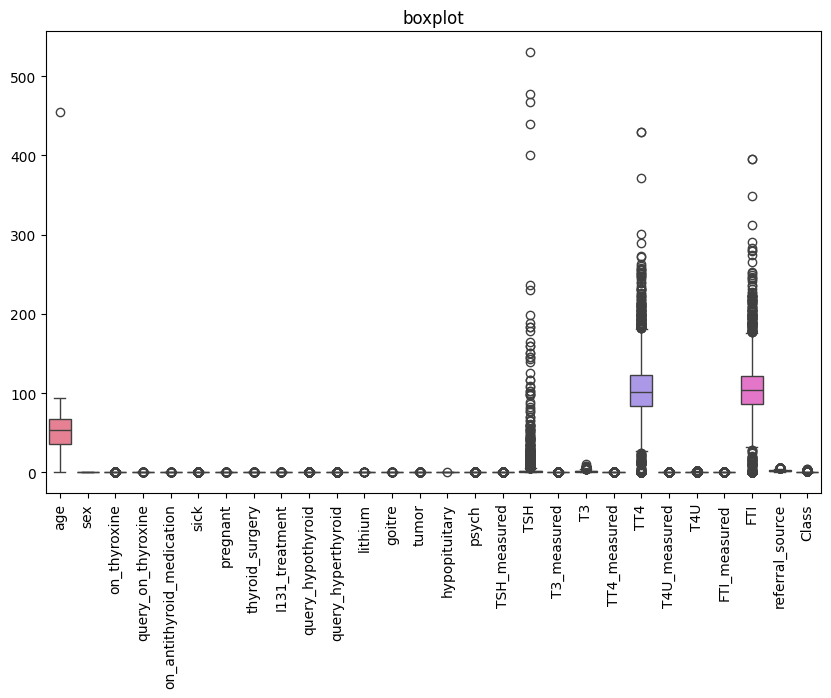

In [36]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.boxplot(data = df)
plt.title("boxplot")

plt.xticks(rotation=90)

plt.show()

In [42]:
numerical_columns

Index(['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [43]:
np.quantile(df["TT4"],[0,.25,.50,.75,1])

array([  0.,  84., 102., 123., 430.])

In [44]:
q1 = df["TT4"].quantile(0.25)
q3 = df["TT4"].quantile(0.75)

In [45]:
IQR= q3-q1

In [46]:
l_fence = q1-1.5*IQR
u_fence = q3+1.5*IQR

In [47]:
df["TT4"]=np.where((df.TT4>=u_fence) | (df.TT4<=l_fence),df["TT4"].mean(),df["TT4"])

In [48]:
np.quantile(df["TSH"],[0,.25,.50,.75,1])
q1 = df["TSH"].quantile(0.25)
q3 = df["TSH"].quantile(0.75)
IQR= q3-q1
l_fence = q1-1.5*IQR
u_fence = q3+1.5*IQR
df["TSH"]=np.where((df.TSH>=u_fence) | (df.TSH<=l_fence),df["TSH"].mean(),df["TSH"])

In [54]:
lower_cap = df["FTI"].quantile(0.05)
upper_cap = df["FTI"].quantile(0.95)
df['FTI'] = np.where(df['FTI'] < lower_cap, lower_cap,
                              np.where(df['FTI'] > upper_cap, upper_cap, df['FTI']))

In [52]:
lower_cap = df["TT4"].quantile(0.05)
upper_cap = df["TT4"].quantile(0.95)
df['TT4'] = np.where(df["TT4"] < lower_cap, lower_cap,
                              np.where(df['TT4'] > upper_cap, upper_cap, df['TT4']))

In [56]:
lower_cap = df["T3"].quantile(0.05)
upper_cap = df["T3"].quantile(0.95)
df['T3'] = np.where(df["T3"] < lower_cap, lower_cap,
                              np.where(df['T3'] > upper_cap, upper_cap, df['T3']))

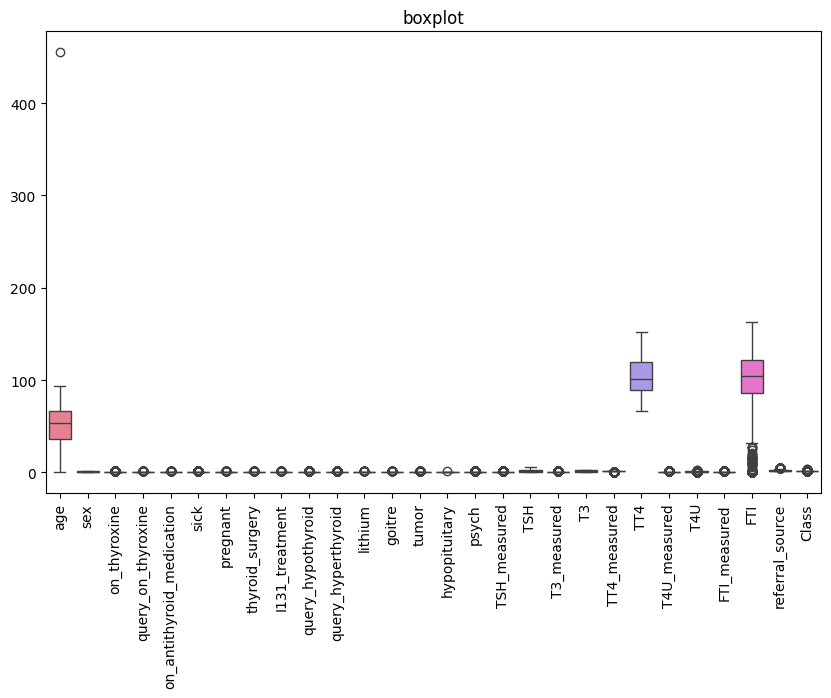

In [57]:
plt.figure(figsize=(22,6))
plt.subplot(1,2,2)
sns.boxplot(data = df)
plt.title("boxplot")

plt.xticks(rotation=90)

plt.show()

In [60]:
X = df.drop("Class",axis=1)
y = df["Class"]

In [61]:
X

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
0      41    0             0                   0                          0   
1      23    0             0                   0                          0   
2      46    1             0                   0                          0   
3      70    0             1                   0                          0   
4      70    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
3767   30    0             0                   0                          0   
3768   68    0             0                   0                          0   
3769   74    0             0                   0                          0   
3770   72    1             0                   0                          0   
3771   64    0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
0        0         0                0               0                  0  ...   
1        0         0                0               0                  0  ...   
2        0         0                0               0                  0  ...   
3        0         0                0               0                  0  ...   
4        0         0                0               0                  0  ...   
...    ...       ...              ...             ...                ...  ...   
3767     0         0                0               0                  0  ...   
3768     0         0                0               0                  0  ...   
3769     0         0                0               0                  0  ...   
3770     0         0                0               0                  0  ...   
3771     0         0                0               0                  0  ...   

       TSH  T3_measured   T3  TT4_measured         TT4  T4U_measured   T4U  \
0     1.30            0  2.5             1  125.000000             0  1.14   
1     4.10            0  2.0             1  102.000000             1  0.00   
2     0.98            1  0.0             1  109.000000             0  0.91   
3     0.16            0  1.9             1  152.000000             1  0.00   
4     0.72            0  1.2             1   66.000000             0  0.87   
...    ...          ...  ...           ...         ...           ...   ...   
3767  0.00            1  0.0             0  101.721645             1  0.00   
3768  1.00            0  2.1             1  124.000000             0  1.08   
3769  5.10            0  1.8             1  112.000000             0  1.07   
3770  0.70            0  2.0             1   82.000000             0  0.94   
3771  1.00            0  2.2             1   99.000000             0  1.07   

      FTI_measured    FTI  referral_source  
0                0  109.0                1  
1                1  104.0                2  
2                0  120.0                2  
3                1  104.0                2  
4                0   70.0                3  
...            ...    ...              ...  
3767             1  104.0                2  
3768             0  114.0                3  
3769             0  105.0                2  
3770             0   87.0                3  
3771             0   92.0                2  

[3622 rows x 27 columns]

In [62]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3767    1
3768    1
3769    1
3770    1
3771    1
Name: Class, Length: 3622, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size= 0.3,random_state=1)

In [73]:
X_train

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
2481   64    0             0                   0                          0   
299    39    1             0                   1                          0   
2093   30    0             0                   0                          0   
2980   23    1             0                   0                          0   
100    28    0             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
2874   62    0             1                   1                          0   
941    59    0             0                   0                          0   
1141   71    0             0                   0                          0   
248    24    0             0                   0                          0   
1106   30    0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
2481     0         0                0               0                  1  ...   
299      0         0                0               0                  0  ...   
2093     0         0                0               0                  0  ...   
2980     0         0                0               0                  0  ...   
100      0         0                0               0                  0  ...   
...    ...       ...              ...             ...                ...  ...   
2874     0         0                0               0                  0  ...   
941      0         0                0               0                  1  ...   
1141     0         0                0               0                  0  ...   
248      0         0                0               0                  0  ...   
1106     0         0                0               0                  0  ...   

        TSH  T3_measured   T3  TT4_measured         TT4  T4U_measured   T4U  \
2481  0.680            0  1.4             1   92.000000             0  0.81   
299   0.000            1  0.0             1   66.000000             0  0.87   
2093  4.300            0  2.0             1   82.000000             1  0.00   
2980  0.780            0  2.0             1  102.000000             0  0.97   
100   1.300            0  1.4             1  120.000000             0  0.82   
...     ...          ...  ...           ...         ...           ...   ...   
2874  0.025            0  2.2             1  101.721645             0  1.03   
941   2.800            1  0.0             1  134.000000             0  1.05   
1141  1.300            0  0.9             1  126.000000             0  0.85   
248   0.400            1  0.0             1  142.000000             0  1.20   
1106  1.300            0  2.3             1  106.000000             0  1.06   

      FTI_measured         FTI  referral_source  
2481             0  114.000000                3  
299              0   72.000000                2  
2093             1  104.000000                2  
2980             0  106.000000                1  
100              0  146.000000                3  
...            ...         ...              ...  
2874             0  162.857375                2  
941              0  128.000000                2  
1141             0  148.000000                3  
248              0  118.000000                2  
1106             0  100.000000                2  

[2535 rows x 27 columns]

In [74]:
X_test

age  sex  on_thyroxine  query_on_thyroxine  on_antithyroid_medication  \
3767   30    0             0                   0                          0   
3464   48    0             0                   0                          0   
1077   55    0             1                   0                          0   
1151   76    1             0                   0                          0   
3518   37    1             0                   0                          0   
...   ...  ...           ...                 ...                        ...   
2812   72    0             0                   0                          0   
1181   79    0             0                   0                          0   
3324   65    0             0                   0                          0   
577    45    0             0                   0                          0   
1998   21    0             0                   0                          0   

      sick  pregnant  thyroid_surgery  I131_treatment  query_hypothyroid  ...  \
3767     0         0                0               0                  0  ...   
3464     0         0                0               0                  0  ...   
1077     0         0                0               0                  0  ...   
1151     0         0                0               0                  0  ...   
3518     0         0                0               0                  0  ...   
...    ...       ...              ...             ...                ...  ...   
2812     0         0                0               0                  1  ...   
1181     0         0                0               0                  0  ...   
3324     0         0                0               0                  0  ...   
577      0         0                0               0                  0  ...   
1998     0         0                0               0                  0  ...   

         TSH  T3_measured   T3  TT4_measured         TT4  T4U_measured   T4U  \
3767  0.0000            1  0.0             0  101.721645             1  0.00   
3464  0.3000            0  2.4             1  117.000000             0  1.02   
1077  0.0000            1  0.0             0  101.721645             1  0.00   
1151  4.5184            0  2.1             1   89.000000             0  1.14   
3518  0.0000            1  0.0             0  101.721645             1  0.00   
...      ...          ...  ...           ...         ...           ...   ...   
2812  1.1000            1  0.0             1  131.000000             0  0.50   
1181  4.5184            1  0.0             1  144.000000             0  1.29   
3324  1.6000            0  1.9             1   99.000000             0  1.03   
577   0.9700            0  1.1             1   77.000000             0  0.86   
1998  1.4000            0  1.6             1   95.000000             0  0.93   

      FTI_measured         FTI  referral_source  
3767             1  104.000000                2  
3464             0  115.000000                2  
1077             1  104.000000                2  
1151             0   78.000000                3  
3518             1  104.000000                2  
...            ...         ...              ...  
2812             0  162.857375                2  
1181             0  111.000000                2  
3324             0   97.000000                3  
577              0   89.000000                3  
1998             0  102.000000                1  

[1087 rows x 27 columns]

In [75]:
y_train

2481    1
299     1
2093    1
2980    1
100     1
       ..
2874    1
941     1
1141    1
248     1
1106    1
Name: Class, Length: 2535, dtype: int64

In [77]:
y_test

3767    1
3464    1
1077    1
1151    2
3518    1
       ..
2812    1
1181    2
3324    1
577     1
1998    1
Name: Class, Length: 1087, dtype: int64

In [78]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
from sklearn.tree import DecisionTreeClassifier


In [81]:
parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth':[1, 2, 3, 4, 6, 8],
    'splitter':['best', 'random'],
    'max_features': ['sqrt', 'log2']
}

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [84]:
model = GridSearchCV(clf, param_grid=parameter, cv = 5, scoring = "accuracy")
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [85]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [86]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [87]:
model.best_score_

0.9644970414201184

In [88]:
model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [94]:
df.shape

(3622, 28)

In [107]:
import pickle
pickle.dump(scaler,open("scaling.pkl","wb"))

In [108]:
import pickle

In [109]:
pickle.dump(model,open("model.pkl","wb"))

In [110]:
pickled_model = pickle.load(open("model.pkl","rb"))

In [112]:
pickled_model.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])